# QAOA for Max Cut, Toy Example
In this notebook the QAOA method is used to solve a small max cut problem. The quantum circuit used is shown and the approximation ratio for depth = 1 is  computed. 

Import necessary modules

In [1]:
from qaoa import QAOA, problems, mixers, initialstates

In [2]:
import numpy as np
import networkx as nx
import sys                     
sys.path.append('../')         
from plotroutines import *

Creating problem instance

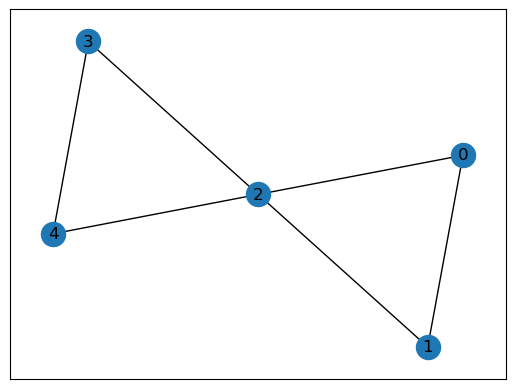

In [3]:
G = nx.Graph()
G.add_nodes_from(np.arange(0, 5, 1))
G.add_weighted_edges_from([(0, 1, 1.0), (0, 2, 1.0), (1, 2, 1.0), (3, 2, 1.0), (3, 4, 1.0), (4, 2, 1.0)])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos)

# Creating a QAOA instance and drawing the quantum circuit
Below the quantum circuit for the QAOA method is shown. The circuit corresponds to preparation of the $\gamma$ and $\beta$ dependent state: $|\gamma, \beta\rangle = e^{-iH_{M}\beta}e^{-iH_C\gamma}|0\rangle $, where $|0\rangle$ is the equal superposition over all computational basis states prepared by the hadamard gates. $H_M$ and $H_C$ are the standar X-mixer and the cost hamiltonian respectively.

In [4]:
qaoa = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X()
)

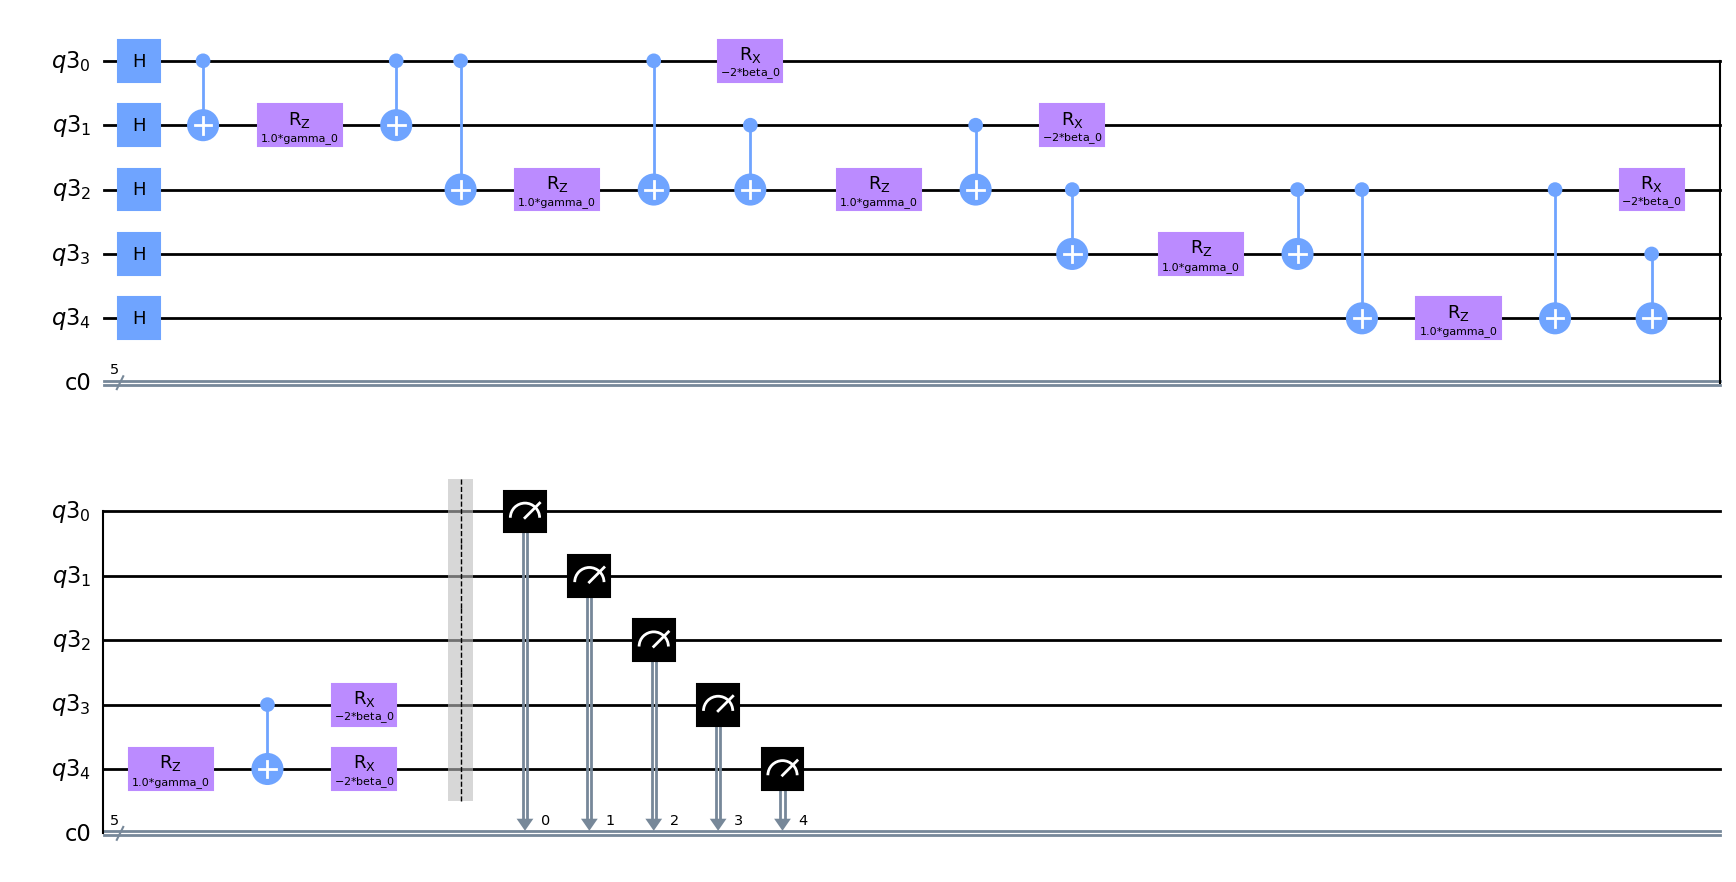

In [5]:
qaoa.createParameterizedCircuit(1)
qaoa.parameterized_circuit.draw(output="mpl")
# qaoamc.initialstate.circuit.draw('mpl')
# qaoamc.mixer_circuit.draw('mpl')
# qaoamc.problem.circuit.draw('mpl')

# Sample and plot cost landscape

The cost landscape is sampled using angles $\gamma, \beta$ $\in$ $[0, \frac{\pi}{2}]$. In the plot a maximum and minimum of the cost function is seen. The cost landscape is periodic with period $\frac{\pi}{2}$ in $\beta$.

2023-09-22 14:46:01 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0
2023-09-22 14:46:01 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 14:46:01 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 14:46:01 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 14:46:01 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 14:46:01 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape


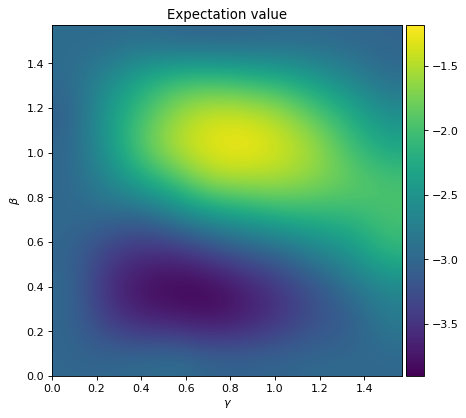

In [6]:
qaoa.sample_cost_landscape( angles={"gamma": [0, np.pi/2 , 10], "beta": [0, np.pi/2 , 10]} )
plot_E(qaoa)

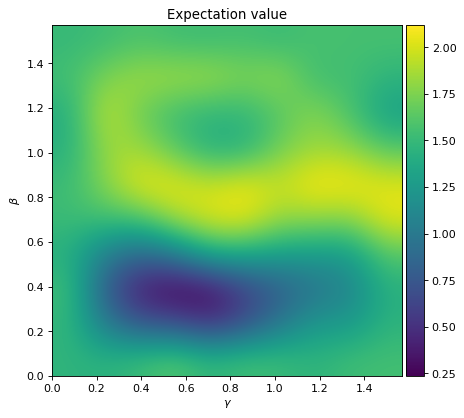

In [7]:
plot_Var(qaoa)

# Search for the best parameters at depth = 1 and plot histogram
The values for the parameters $\gamma$ and $\beta$ are found by the optimizer, and the circuit is then measured 2048 times. The measurement outcomes are seen in the histogram below.

0.9868164062499999
0.03156215634164222
[0.5923145]
[0.34255902]
0.9462890625
0.17026744257086998
[0.96493742 0.5550916 ]
[0.34008663 1.37593565]
0.9946289062499999
0.010637180779569893
[2.01850875 0.44025084 1.60195567]
[0.44334285 0.71805011 1.3532348 ]
0.98779296875
0.03752653806207235
[3.09820871 2.13879217 0.80080424 2.73024473]
[0.53590984 1.73015928 1.3223214  1.19807981]
0.9877929687500001
0.029706401209677425
[4.23302435 2.3600756  1.67713686 1.35790772 2.71927034]
[1.55016682 1.46232281 1.51867965 1.13622633 1.18310668]


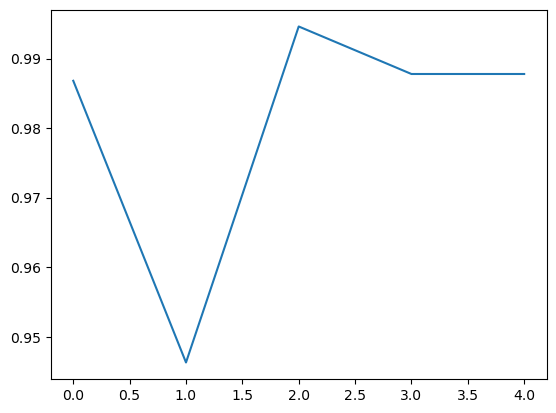

In [11]:
qaoa.optimize(5)  # Search for the best parameters at depth = 1
for i in range(1,6):
    print(-qaoa.get_Exp(depth=i)/4)
    print(qaoa.get_Var(depth=i)/4)
    print(qaoa.get_gamma(depth=i))
    print(qaoa.get_beta(depth=i))

pl.plot(-np.array(qaoa.get_Exp())/4)

# Compute and print approximation ratio
Below the approximation ratio is found using that the maximum cut for the given problem is 4.

In [ ]:
best_cost = 4
print("approximation ratio=", -list(qaoa.costval.values())[0] / best_cost)